In [2]:
import numpy as np
import subprocess
import os
import glob
import yaml
import xarray as xr
import math
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import osprey_io as io
import osprey_means as osm
import osprey_actions as osa

In [3]:
#
expname='mesh'
startyear = 2150
endyear = 2200
df = osm.elements(expname)
data = io.readmf_T(expname, startyear, endyear)
meandata = data.groupby('time.month').mean(dim='time')

In [4]:
data

<xarray.Dataset>
Dimensions:               (y: 148, x: 180, time: 600, z: 31, axis_nbounds: 2)
Coordinates:
    nav_lat_grid_T        (y, x) float32 dask.array<chunksize=(148, 180), meta=np.ndarray>
    nav_lon_grid_T        (y, x) float32 dask.array<chunksize=(148, 180), meta=np.ndarray>
    time_centered         (time) object dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) object 2150-01-16 12:00:00 ... 2199-12-16 12...
  * z                     (z) float32 -5.0 -15.0 -25.0 ... -4.75e+03 -5.25e+03
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/25)
    deptht_bounds         (time, z, axis_nbounds) float32 dask.array<chunksize=(12, 31, 2), meta=np.ndarray>
    time_centered_bounds  (time, axis_nbounds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    e3t                   (time, z, y, x) float32 dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>
    to                    (time, z, y, x) float32 dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>
    so                    (time, z, y, x) float32 dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>
    ...                    ...
    qt_oce                (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    sfx                   (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    taum                  (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    windsp                (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    precip                (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    snowpre               (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
Attributes:
    name:         output/nemo/mesh_oce_1m_T
    description:  ECE4/NEMO T grid variables
    title:        ECE4/NEMO T grid variables
    Conventions:  CF-1.6
    timeStamp:    2024-Apr-12 02:18:25 GMT
    uuid:         a4fcedeb-2ded-4dec-b58b-77d5eb788bc8

In [18]:
#meandata = meandata.rename_dims({'month': 'time'})
#meandata = meandata.rename({'month': 'time'})

In [14]:
to_ave = meandata['to'].weighted(df['vol']).mean(dim=['z', 'y', 'x']).plot()

: 

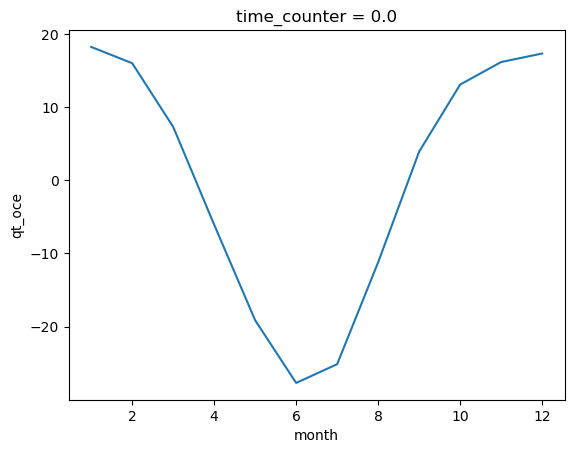

In [7]:
meandata['qt_oce'].weighted(df['area']).mean(dim=['y', 'x']).plot()

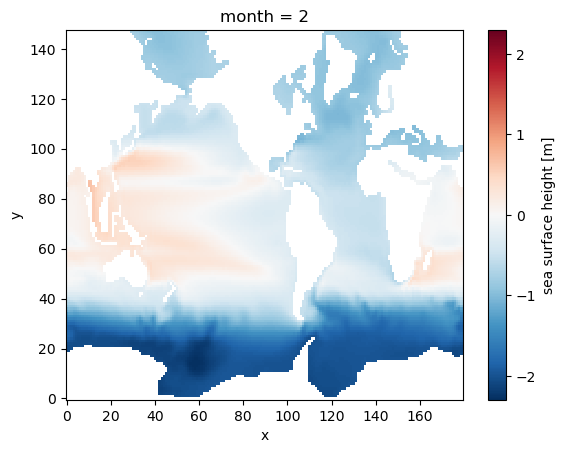

In [10]:
meandata['zos'].isel(month=1).plot()